In [2]:
# We use torch and sklearn only on steps of fitting data
import torch
from tqdm import tqdm
from scipy.optimize import linprog
from torchvision import datasets
import torchvision.transforms as transforms
from sklearn.model_selection import train_test_split

import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# Problem 2: Separating hyperplanes and the Perceptron Learning Algorithm (3pts)
### <div align="right"> &copy; Yurii Yeliseev & Rostyslav Hryniv, 2022 </div>

## Completed by:   
*   Nazar Andrushko
*   Roman Kovalchuk


#### The aim of this task is to discuss a simple binary classification method for linearly separated classes. The Perceptron Learning Algorithm finds a ***separating hyperplane*** in finitely many steps and is based on a clear geometric update method. We will derive the upper bound on the number of iterations in PLA and implement it for digit classification for the MNIST database.

## 1. Separating hyperplanes and classification (0.9 pts)

### 1.1. Binary classification.    
A typical task of binary classification reads as follows. We are given the set of labelled (training) data $(\mathbf{x}_k, y_k), k=1,2,\dots, N$, where $\mathbf{x}_k \in \mathbb{R}^d$ gives a data point and the label $y_k = \pm1$ encodes the class (e.g. $y_k=1$ is the <font color='red'>''red''</font> class and $y_k=-1$ is the <font color='blue'>''blue''</font> one). The task is to find a classfier $f \,:\, \mathbb{R}^d \to \pm1$ that would correctly recognize the classes, i.e. satisfy $y_k f(\mathbf{x}_k) >0$ for all (or most) $k=1,2,\dots,N$. This function can then be used to guess the class of new (unseen) data $\mathbf{x}\in\mathbb{R}^n$.



### 1.2. Separating hyperplane  
The simplest case is when the red and blue classes are *linearly separable*, i.e., when there is a hyperplane $H: \mathbf{w} \cdot \mathbf{x} + w_0 = 0$ separating the red and blue datapoints. Then  $f(\mathbf{x}) = \mathbf{w}\cdot \mathbf{x} + w_0$ is an affine classifier, so that $f(\mathbf{x}_k)>0$ for red points and $f(\mathbf{x}_k)<0$ for blue ones. Augmenting $\mathbf{x}$ to $\widehat{\mathbf{x}} := (1, \mathbf{x})$ and $\widehat{\mathbf{w}} = (w_0,\mathbf{w})$, we recognize that $f(\mathbf{x})= \widehat{\mathbf{x}}\cdot \widehat{\mathbf{w}}$. Therefore, the angles between $\widehat{\mathbf{x}}$ and $\widehat{\mathbf{w}}$ are acute for red datapoints and obtuse for the blue ones. The task is therefore to find the *normal vector* $\widehat{\mathbf{w}}$ with this properties.

### 1.3. The idea behind the Perceptron learning algorithm (PLA)

To simplify the notations, in what follows we will omit the "hats" above the $(d+1)$-dimensional vectors $\widehat{\mathbf{x}}$ and $\widehat{\mathbf{w}}$.

PLA is an iterative algorithm that updates the direction vector ${\mathbf{w}}$ towards a misclassified example, one at a time.

Let's recall that correctly classified vectors $\mathbf{x}_j$ must satisfy the inequality
$$
  y_j ({\mathbf{w}}\cdot {\mathbf{x}}_j) > 0.
$$
If a red $\mathbf{x}_j$ is misclassified, then the angle between ${\mathbf{w}}$ and ${\mathbf{x}}_j$ is obtuse. The idea is that we should decrease the angle between them by updating ${\mathbf{w}}$ to ${\mathbf{w}} + {\mathbf{x}}_j$ (see Figure 1). Likewise, if a blue $\mathbf{x}_j$ is misclassified, then the angle between ${\mathbf{w}}$ and ${\mathbf{x}}_j$ is acute, and we increase it be replacing ${\mathbf{w}}$ with ${\mathbf{w}} - {\mathbf{x}}_j$. In both cases, the update is $${\mathbf{w}} \mapsto {\mathbf{w}} + y_j {\mathbf{x}}_j$$

<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta http-equiv="X-UA-Compatible" content="IE=edge">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title></title>
</head>
<body>
    <img src="https://drive.google.com/uc?export=view&id=12rduejeedS8NxrxXkSBJkkcDH3lB0k-R">


</body>
</html>

### 1.4. **PLA**

The above considerations suggest the following **PLA**:
1.   Start with ${\mathbf{w}}_0=\mathbf{0}$ and classify the points
2.   Take an arbitrary misclassified point
3.   Update the ${\mathbf{w}}$
4.   Update the classification
5.   Repeat 2-4 until there are misclassified points.


### 1.5. **PLA**: proof of convergence (0.9 pts)


---


#### **1.5.1 (0.3 pts)** Analyze the PLA update step  
Prove that by updating ${\mathbf{w}}$, we are decreasing or increasing (as required) the angle between ${\mathbf{w}}$ and ${\mathbf{x}}_j$.

---



## First case
The cosine of the angle between $w$ and $x_j$ is given by:

$$ \text{cos of angle between } w \text{ and } x_j = \frac{(w, x_j)}{||w|| \cdot ||x_j||} = \text{old\_cosine} $$

The cosine of the angle after updating is:

$$ \text{cos of Angle after updating} = \frac{(w + y_j \cdot x_j, x_j)}{||w + y_j \cdot x_j|| \cdot ||x_j||} = \text{updated\_cosine} $$

Let's consider that $ x_j $ is a red point and is misclassified. Therefore, the angle between $ x_j $ and $ w $ is obtuse, and we need to show that the angle becomes more acute.

Given: $ (w, x_j) < 0 $ and $ y_j = 1$

Now let's see what happens with $( {updated\_cosine} - {old\_cosine} )$:

1. Since (triangle ineq. ):
$$ \frac{((w, x_j) + (x_j, x_j))}{||w+x_j||||x_j||} > \frac{((w, x_j) + (x_j, x_j))}{(||w|| + ||x_j||)||x_j||} $$

2. Then we can proof that and we will show that $( {updated\_cosine} - {old\_cosine} ) > 0$, so the angle is more acute.

$$  \frac{((w, x_j) + (x_j, x_j))}{(||w|| + ||x_j||)||x_j||} > \frac{(w, x_j)}{||w||||x_j||} \text{   (want to proof) } $$ 

3. Bring to the common denominator : 


$$  \frac{((w, x_j)||w|| + ||x_j||^2||w||)}{(||w|| + ||x_j||)||x_j||||w||} > \frac{(w, x_j)(||w|| + ||x_j||)}{||w||||x_j||(||w|| + ||x_j||)} $$

4. Which is the same as : (since denominator is > 0)

$$  ((w, x_j)||w|| + ||x_j||^2||w||) > (w, x_j)(||w|| + ||x_j||)$$


5. But ||x_j||^2||w|| > 0, so we can remove it from the left side of equation, and if it will hold, then 4. will hold.

$$  ((w, x_j)||w||) > (w, x_j)(||w|| + ||x_j||)$$

6. Divide by (w, x_j), which is less than zero. 


$$ ||w|| < ||w|| + ||x_j||$$


Which is true. Therefore, from 6 we know that 5 is true, from 5 -> 4, and so on, so the initial equation 1. is true.




Therfore $\text{updated\_cosine}  - \text{old\_cosine} > 0$ therefore angle between $w$ and $x_j$ is more acute.


## Second case
??


---


#### **Assumptions and notations**

***Assumption on linear separability*** There exists an ${\mathbf{w}^{\star}} \in \mathbb{R}^{d+1}$ of unit length and $\gamma > 0$ such that $$y_k\, {\mathbf{x}}_k\cdot {\mathbf{w}}^{\star} \ge \gamma, \qquad k=1,2,\dots, n.$$ The value $\gamma$ determines the width of the *separating slab* free of any datapoints. The larger $\gamma$, the wider the slab and the more robust the classifier is to noise in data.  

We also denote by $R$ the maximum norm of $\mathbf{x}_k$

***Theorem on PLA convergence.*** The PLA makes at most $\frac{R^2}{\gamma^2}$ updates, after which it returns a separating hyperplane.

***Proof.*** Should the algorthm terminate, then the resulting ${\mathbf{w}}$ determines a separating hyperplane. Thus it suffices to show that the algorithm terminates after at most $\frac{R^2}{\gamma^2}$ updates. The approach is to get upper and lower bounds on the norm of the $k^{\mathrm{th}}$ update ${\mathbf{w}}_k$ of the weighting vector ${\mathbf{w}}$, starting with ${\mathbf{w}}_0 = \mathbf{0}$.

Assume that $k\ge 1$ and ${\mathbf{x}}_j$ is a misclasssified point on iteration $k$; then
$$
\begin{aligned}
\mathbf{w}_{k+1} \cdot {\mathbf{w}}^{\star} &=\left({\mathbf{w}}_k + y_j \mathbf{x}_j\right) \cdot {\mathbf{w}}^{\star} \\
&={\mathbf{w}}_k \cdot {\mathbf{w}}^{\star}+y_j\left({\mathbf{x}}_j \cdot {\mathbf{w}}^{\star}\right) \\
&>{\mathbf{w}}_k \cdot {\mathbf{w}}^{\star} + \gamma
\end{aligned}
$$

---

#### **1.5.2. (0.3 pts)** Explain by induction that ${\mathbf{w}}_{k} \cdot {\mathbf{w}}^{\star}> k \gamma$.

---

1. Base step:
k = 1

$w_1 * w^{\star} > w_0 * w^{\star} + \gamma = 1 * \gamma$

2. Induction step.
Assume that statement is correct for $1 <= k <= n$, therefore $w_n * w^{\star} > k * \gamma$, then let's show that it is correct for k = n +1.

 $w_{n+1} * w^{\star} > w_n * w^{\star} + \gamma >\text{ |by our assumption|  } > n * \gamma + \gamma = (n+1)*\gamma.$

3. By confirming the base case and demonstrating the inductive step, we establish that the statement is true for all integers n ≥ 1.


---



As a result, we see that
$$\|\mathbf{w}_k\| \ge {\mathbf{w}}_{k} \cdot {\mathbf{w}}^{\star}> k \gamma\tag{1}$$

To obtain the upper bound, we argue that
$$
\begin{aligned}
\left\|\mathbf{w}_{k+1}\right\|^2 &=\left\|\mathbf{w}_k+y_j \mathbf{x}_j\right\|^2 \\
&=\left\|\mathbf{w}_k\right\|^2+\left\|y_j \mathbf{x}_j\right\|^2+2\left(\mathbf{w}_k \cdot \mathbf{x}_j\right) y_j \\
&=\left\|\mathbf{w}_k\right\|^2+\left\|\mathbf{x}_j\right\|^2+2\left(\mathbf{w}_k \cdot \mathbf{x}_j\right) y_j
\end{aligned}
$$

---

#### **1.5.3. (0.3 pts)** Derive the lower bound
$$
\begin{aligned}
\left\|\mathbf{w}_{k+1}\right\|^2
&\le\left\|\mathbf{w}_k\right\|^2+\left\|\mathbf{x}_j\right\|^2 \\
&\le\left\|\mathbf{w}_k\right\|^2+R^2
\end{aligned}
$$
and use induction to conclude that
$$
\left\|\mathbf{w}_{k}\right\|^2 \le k\, R^2 \tag{2}
$$

---

1. Base case.
k = 0

$ ||w_0||^2 = 0 <= 0*R^2$

2. Inductive step

Assume that statement is correct for $0 <= k <= n$, therefore $|w_n|^2 <= nR^2$ , then let's show that it is correct for k = n +1.

$ ||w_{n+1}||^2 <= ||w_n||^2 + R^2 <= nR^2 + R^2 = (n+1)R^2 $

3. By confirming the base case and demonstrating the inductive step, we establish that the statement is true for all integers n ≥ 0.

---

Together, (1) and (2) yield
$$
k^2 \gamma^2<\left\|\mathbf{w}_{k}\right\|^2 \le k R^2,
$$
which implies the bound $k<\frac{R^2}{\gamma^2}$ and finishes the proof.

## 2. PLA implementation on MNIST dataset (1.8 pts)

### 2.1. Data

`train_data` is torch dataset object where images and targets lie inside `train_data.data` and `train_data.targets` respectively. To convert to numpy array you can use `.numpy()` method.

In [3]:
train_data = datasets.MNIST(root='data', train=True, download=True)

100%|██████████| 9912422/9912422 [00:00<00:00, 10301645.67it/s]


Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 20413834.48it/s]


Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 10223999.27it/s]


Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 9963665.67it/s]


Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



### 2.2 Take 2 digits samples **(0.3 pts)**

First of all you need to take only two digits samples from the dataset and convert the targets properly for the PLA. Choose the two digits based on the sum of your birthdays (e.g. 2 and 4 if it is 24; take 4 and 5 if it is 44)

In [16]:
def filter_data(train_data, digit_1, digit_2):
    """
    Take only digit_1 and digit_2 from the dataset and transform labels
    Args:
        train_data: torchvision.datasets.mnist.MNIST
        digit_1: int (from 0 to 9)
        digit_2: int (from 0 to 9)

    Returns:
        train_data: torchvision.datasets.mnist.MNIST or np.array
    """
    # ========= YOUR CODE STARTS HERE ========= #
    digits_cls = torch.tensor([digit_1, digit_2])
    indices = torch.isin(train_data.targets, digits_cls)
    train_data.data, train_data.targets = train_data.data[indices], train_data.targets[indices]
    # ========== YOUR CODE ENDS HERE ========== #
    
    return train_data

In [64]:
train_data = filter_data(train_data, 1, 2)

mapper = {1:1,2:-1}

### 2.3 Take a smaller subset and divide it into train and test sets **(0.3 pts)**


Since the dataset is big, you need to use only part of it in this task (take
~20-30% of the whole dataset for further processing).

1. Properly subdivide dataset
2. Calculate number samples in each class for test and train

***Note***: you need to have same distributions inside train and test set

In [68]:
import random
from sklearn.model_selection import train_test_split
def split_dataset(train_data):
    """
    Split dataset into train and test parts.

    !Hint: You can use train_test_split from sklearn for that

    Args:
        train_data: torchvision.datasets.mnist.MNIST or np.array

    Returns:
        X_train: Array of shape (N, 28, 28), images from the train set
        y_train: Array of shape (N), labels from the train set

        X_test: Array of shape (N, 28, 28), images from the test set
        y_test: Array of shape (N), labels from the test set
    """
    # ========= YOUR CODE STARTS HERE ========= #
    all_idx = list(range(len(train_data)))
    subsample = random.sample(all_idx,int(len(all_idx)*0.3))

    mapped_targets = torch.tensor([mapper[item.item()] for item in train_data.targets])

    small_train_data, small_train_targets = train_data.data[subsample], mapped_targets[subsample]
    
    X_train, X_test, y_train, y_test = train_test_split(small_train_data,small_train_targets)
    # ========== YOUR CODE ENDS HERE ========== #
    return X_train, X_test, y_train, y_test

In [69]:
X_train, X_test, y_train, y_test = split_dataset(train_data)

In [70]:
print(f"Number of samples in train: {len(X_train)} \n\
Classes number in train: {torch.sum(y_train == 1)}, {torch.sum(y_train == -1)} \n\
Number of samples in test: {len(X_test)} \n\
Classes number in test: {torch.sum(y_test == 1)}, {torch.sum(y_test == -1)}")

Number of samples in train: 2857 
Classes number in train: 1524, 1333 
Number of samples in test: 953 
Classes number in test: 538, 415


### 2.4 Visualize samples for the train set

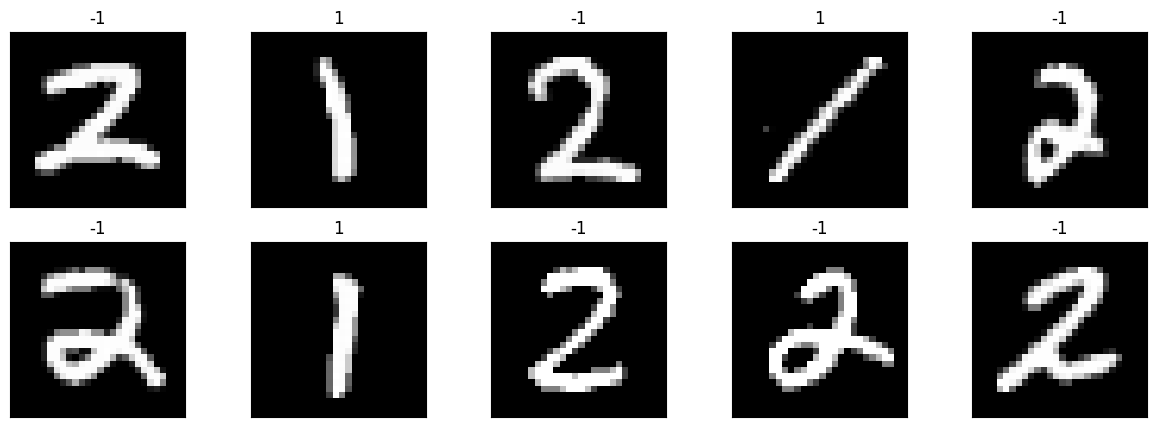

In [71]:
fig = plt.figure(figsize=(15, 5))
for idx in np.arange(10):
    ax = fig.add_subplot(2, 5, idx+1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(X_train[idx].numpy()), cmap='gray')
    ax.set_title(str(y_train[idx].item()))

### 2.5 Preprocess the samples and initialize $\mathbf{w}$ **(0.4 pts)**

The original algorithm starts from zero parameter vector, but actually we can use just randomly initialized vector; it will make it faster to converge

**Instructions**: Complete the missing lines of code and calculate the performance on test set

In [114]:
def prep_data(X_train):
    """
    Flatten, normalize and extra column for bias
    Args:
        X_train: np.array of shape (N, 28, 28)

    Returns:
        X: preprocessed data
    """
    # Flatten the images
    X = X_train.reshape(X_train.shape[0], -1)  # Reshape to (N, 784)

    # Normalize the pixel values 
    X = X / 255.0

    # Add a column for bias 
    bias_column = np.ones((X.shape[0], 1))  # Column of ones
    X = np.hstack((bias_column, X))  # Append bias column to the left

    return X

def initialize_weight_vector(size):
    """
    Create random parameter vector
    Args:
        size: Number of elements

    Returns:
        W: np.array of shape (size)
    """
    W = np.random.randn(size)  # Using normal distribution with mean 0 and variance 1

    return W

def misclassified(X, y, W):
    """
    Calculate indices of misclassified points
    Args:
        X: np.array, training images
        y: np.array, training labels
        W: np.array, parameter vector

    Returns:
        M: np.array of shape (m,) - indices of misclassified points, where m is a number of misclassified points
    """
    predictions = np.dot(X, W)

    binary_predictions = np.where(predictions >= 0, 1, -1)
    
    misclassified_indices = np.where(binary_predictions != y.numpy())[0]

    return misclassified_indices


X_train_flat_aug = prep_data(X_train)
X_test_flat_aug = prep_data(X_test)

W = initialize_weight_vector(X_train_flat_aug.shape[1])

### 2.6 Training loop **(0.5 pts)**
Here you need to complete the training loop of the PLA algorithm. Observe that recalculation the misclassified set (Step 3 of the PLA algorithm) is the most costly (as we need to iterate through the whole train set). To speed up the algorithm convergence, we will do the following:
-  determine the set $S$ of misclassified datapoints
-  for every $\mathbf{w}\in S$ that is still misclassified, update the vector $\mathbf{w}$
-  only after that recalculate the set $S$

In [118]:
def loop(X_train_flat_aug, y_train):
    """
    Returns:
        W: the final vector of weights for the separating hyperplane
    """
    W = initialize_weight_vector(X_train_flat_aug.shape[1])

    for i in range(1000):
        misclass = misclassified(X_train_flat_aug, y_train, W)
        if len(misclass) == 0:
            print(f"Found separating hyperplane on step {i}!")
            break

        unique, counts = np.unique(y_train[misclass], return_counts=True)
        value_counts = dict(zip(unique, counts))
        print(value_counts)

        for m in misclass:
            x_misclass = X_train_flat_aug[m]
            y_misclass = y_train[m]

            
            W = np.add(W, np.multiply(y_misclass, x_misclass))  # Update weights using element-wise multiplication and addition

    return W

W = loop(X_train_flat_aug, y_train)


MISSCLASIFIED DIST
{-1: 356, 1: 1139}
MISSCLASIFIED DIST
{-1: 1333}
MISSCLASIFIED DIST
{1: 1495}
MISSCLASIFIED DIST
{-1: 262, 1: 26}
MISSCLASIFIED DIST
{-1: 77, 1: 70}
MISSCLASIFIED DIST
{-1: 67, 1: 64}
MISSCLASIFIED DIST
{-1: 58, 1: 53}
MISSCLASIFIED DIST
{-1: 55, 1: 53}
MISSCLASIFIED DIST
{-1: 49, 1: 49}
MISSCLASIFIED DIST
{-1: 46, 1: 45}
MISSCLASIFIED DIST
{-1: 44, 1: 41}
MISSCLASIFIED DIST
{-1: 36, 1: 38}
MISSCLASIFIED DIST
{-1: 35, 1: 36}
MISSCLASIFIED DIST
{-1: 30, 1: 34}
MISSCLASIFIED DIST
{-1: 30, 1: 31}
MISSCLASIFIED DIST
{-1: 30, 1: 31}
MISSCLASIFIED DIST
{-1: 29, 1: 30}
MISSCLASIFIED DIST
{-1: 29, 1: 30}
MISSCLASIFIED DIST
{-1: 25, 1: 29}
MISSCLASIFIED DIST
{-1: 24, 1: 29}
MISSCLASIFIED DIST
{-1: 24, 1: 29}
MISSCLASIFIED DIST
{-1: 25, 1: 29}
MISSCLASIFIED DIST
{-1: 25, 1: 28}
MISSCLASIFIED DIST
{-1: 24, 1: 26}
MISSCLASIFIED DIST
{-1: 21, 1: 26}
MISSCLASIFIED DIST
{-1: 23, 1: 24}
MISSCLASIFIED DIST
{-1: 21, 1: 24}
MISSCLASIFIED DIST
{-1: 22, 1: 23}
MISSCLASIFIED DIST
{-1: 22,

### 2.7 Evaluate performance of the linear classifier on the test set **(0.3 pts)**

Check your classifier on the test set. Think of possible metrics that characterize performance and comment on how good the classifier is

In [119]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

def evaluate_classifier(X_test_flat_aug, y_test, W):
    predictions = np.dot(X_test_flat_aug, W)
    binary_predictions = np.where(predictions >= 0, 1, -1)
    accuracy = accuracy_score(y_test, binary_predictions)
    precision = precision_score(y_test, binary_predictions, average='weighted')  # Change average to 'weighted'
    recall = recall_score(y_test, binary_predictions, average='weighted')  # Change average to 'weighted'
    f1 = f1_score(y_test, binary_predictions, average='weighted')  # Change average to 'weighted'
    confusion = confusion_matrix(y_test, binary_predictions)

    return accuracy, precision, recall, f1, confusion

# Usage:
accuracy, precision, recall, f1, confusion_matrix = evaluate_classifier(X_test_flat_aug, y_test, W)
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")
print(f"Confusion Matrix:\n{confusion_matrix}")


Accuracy: 0.9832109129066107
Precision: 0.9832270793047466
Recall: 0.9832109129066107
F1-score: 0.9832013522660364
Confusion Matrix:
[[405  10]
 [  6 532]]


## 3. Conclusions **(0.3 pts)**

Summarize in a few sentences what you have learned and achieved by completing the tasks of this assignment


\### **YOUR ANSWER HERE** \###